In [1]:
import gensim
import numpy as np
import pandas as pd
import os
import re
import csv
import codecs
import sys
import pickle
import keras, tensorflow
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split

from keras import callbacks
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, BatchNormalization, Activation, Bidirectional
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from keras.preprocessing.sequence import pad_sequences

import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
from keras.utils import plot_model 
from IPython.display import Image
import pydot
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow as tf


from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from string import punctuation

from keras import backend as K
from keras.engine.topology import Layer
#from keras import initializations
from keras import initializers, regularizers, constraints



D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [2]:
# Load training history of three lstm model
file1 = open('./history/history(Bidirectional_lstm_300Length_40epoch_training)', 'rb')
history_1 = pickle.load(file1)
file1.close()

file2 = open('./history/history(LSTM_with_attention_128Length_40Epoch_training)', 'rb')
history_2 = pickle.load(file2)
file2.close()

file3 = open('./history/history(LSTM_with conditional encoding and attention_training)', 'rb')
history_3 = pickle.load(file3)
file3.close()

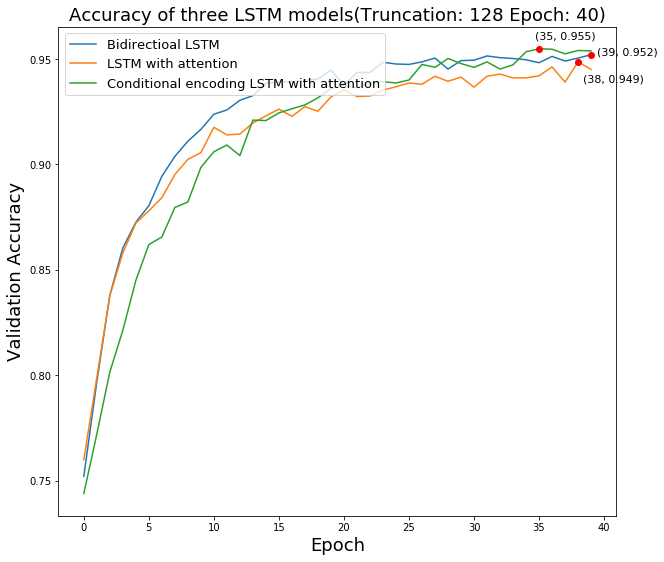

In [3]:
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

ax.plot(history_1['val_acc'])
ax.plot(history_2['val_acc'])
ax.plot(history_3['val_acc'])

ymax1 = max(history_1['val_acc'])
xmax1 = history_1['val_acc'].index(ymax1)

ymax2 = max(history_2['val_acc'])
xmax2 = history_2['val_acc'].index(ymax2)

ymax3 = max(history_3['val_acc'])
xmax3 = history_3['val_acc'].index(ymax3)

plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*1.011, ymax1*1.00 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=11)
plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*1.01, ymax2*0.99 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=11)
plt.plot(xmax3,ymax3,'ro')
plt.text(xmax3*0.99, ymax3*1.005 , '(%d, %.3f)'%(xmax3,ymax3), fontsize=11)


plt.title('Accuracy of three LSTM models(Truncation: 128 Epoch: 40)', fontsize=18)
plt.ylabel('Validation Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['Bidirectioal LSTM', 'LSTM with attention','Conditional encoding LSTM with attention'], loc='upper left',fontsize=13)
plt.savefig("Validation Accuracy of three LSTM models.png",dpi = 360)

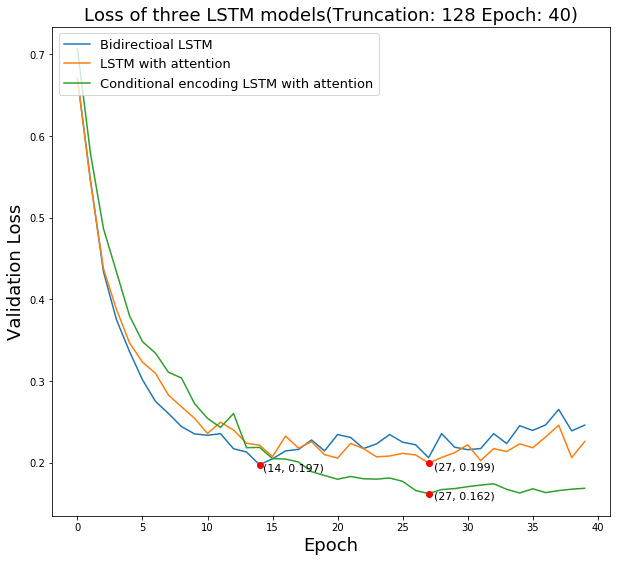

In [4]:
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

ax.plot(history_1['val_loss'])
ax.plot(history_2['val_loss'])
ax.plot(history_3['val_loss'])

ymin1 = min(history_1['val_loss'])
xmin1 = history_1['val_loss'].index(ymin1)

ymin2 = min(history_2['val_loss'])
xmin2 = history_2['val_loss'].index(ymin2)

ymin3 = min(history_3['val_loss'])
xmin3 = history_3['val_loss'].index(ymin3)

plt.plot(xmin1,ymin1,'ro')
plt.text(xmin1*1.02, ymin1*0.96 , '(%d, %.3f)'%(xmin1,ymin1), fontsize=11)
plt.plot(xmin2,ymin2,'ro')
plt.text(xmin2*1.015, ymin2*0.96 , '(%d, %.3f)'%(xmin2,ymin2), fontsize=11)
plt.plot(xmin3,ymin3,'ro')
plt.text(xmin3*1.015, ymin3*0.96 , '(%d, %.3f)'%(xmin3,ymin3), fontsize=11)

plt.title('Loss of three LSTM models(Truncation: 128 Epoch: 40)', fontsize=18)
plt.ylabel('Validation Loss',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['Bidirectioal LSTM', 'LSTM with attention','Conditional encoding LSTM with attention'], loc='upper left',fontsize=13)
plt.savefig("Validation Loss of three LSTM models.png",dpi = 360)


